<a href="https://colab.research.google.com/github/sathasivamn/Random-Forest/blob/main/Assignment_14_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest

## 1: Import required Libraries.
## 2: Load the dataset.
## 3: EDA - Structure and Missing Values.
## 4: Data Visualization.
## 5: Data Preprocessing.
## 6: Random Forest Model Implementation.
## 7: Bagging Classifier.
## 8: Boosting Classifier (AdaBoost).
## 9: Interview Questions: Answers.

# 1: Import Libraries.

In [42]:
# Import necessary library
!pip install -U scikit-learn

In [43]:
# Import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# 2: Load Dataset.
#### Preview data.

In [44]:
# 2: Load Excel file and select sheet "glass"
df = pd.read_excel('glass.xlsx', sheet_name='glass')

# Preview data
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# 3: EDA.
#### Structure and Missing Values.
#### Class Distribution.

In [45]:
# 3: EDA - Structure and Missing Values
print("Data Info:")
print(df.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


In [46]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [47]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.00

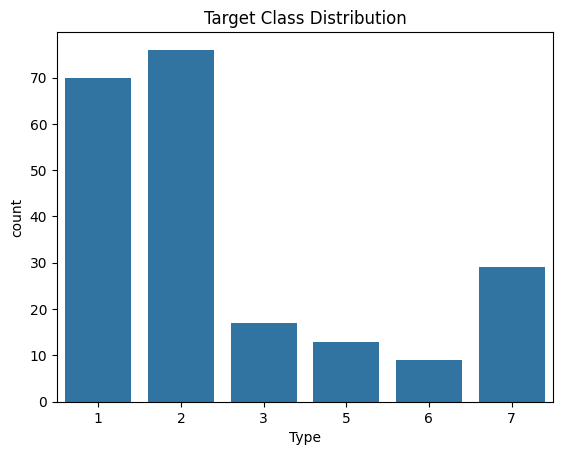

In [48]:
# Class Distribution
sns.countplot(x='Type', data=df)
plt.title("Target Class Distribution")
plt.show()

# 4: Data Visualization.
#### Application of Histogram method.
#### Applying Boxplots for finding Outliers.
#### Applying Pairplot to visualize feature relationships

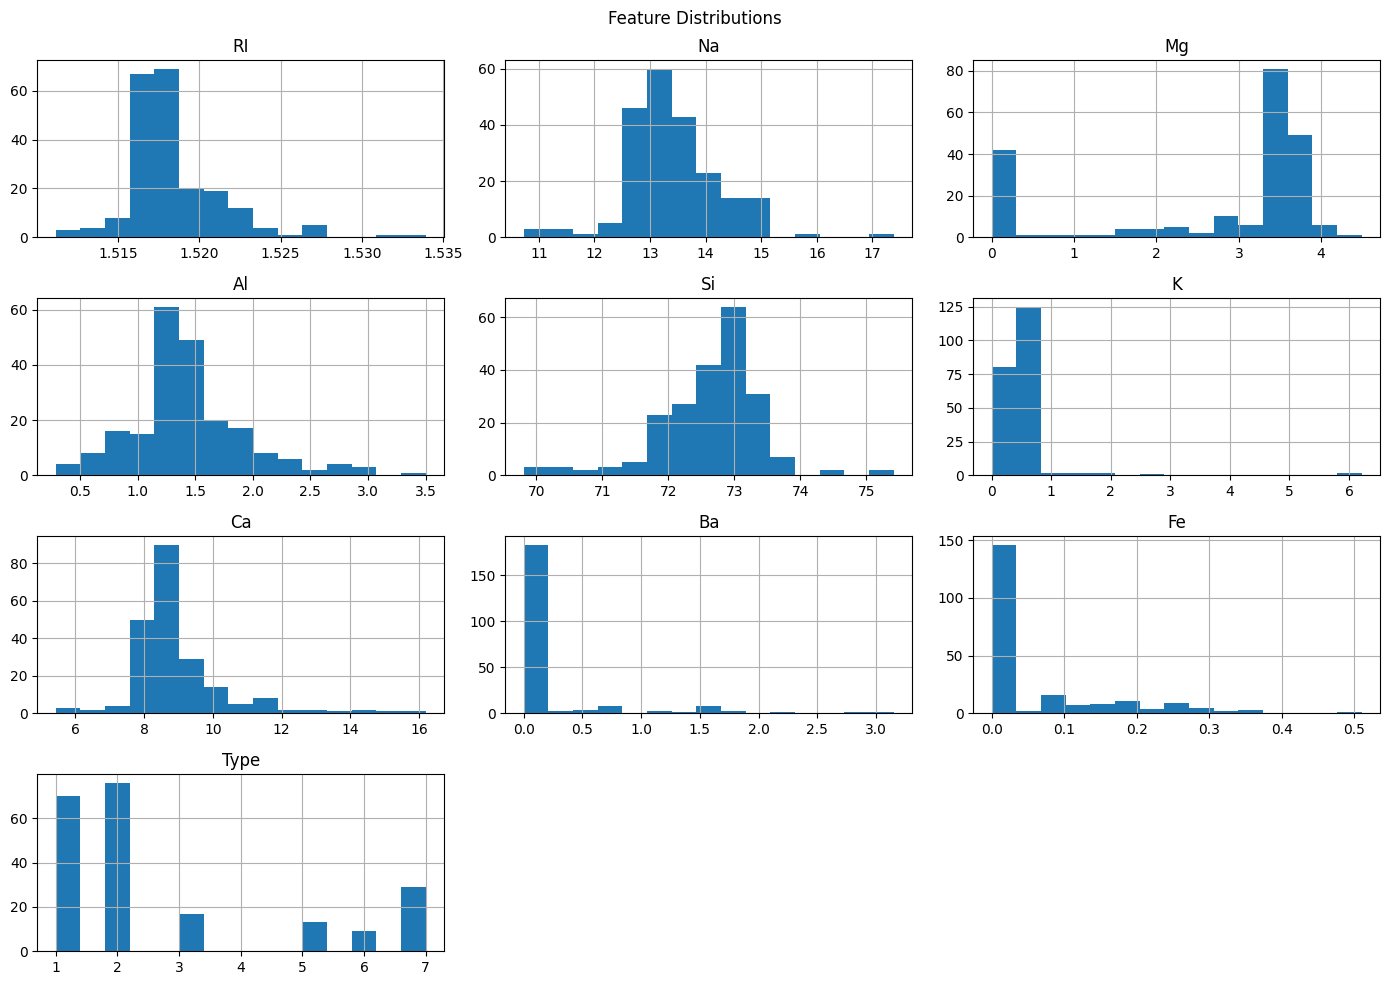

In [49]:
# 4: Data Visualization

# Histograms
df.hist(figsize=(14, 10), bins=15)
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

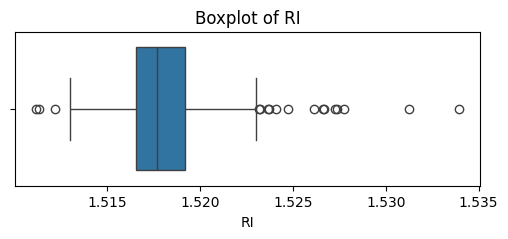

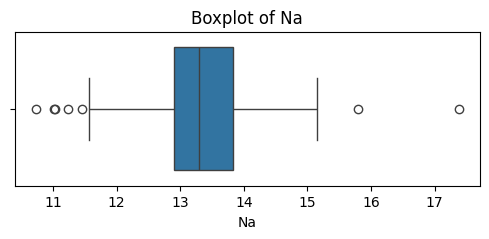

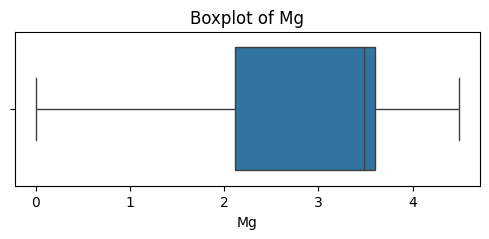

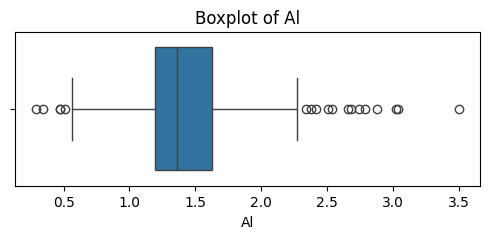

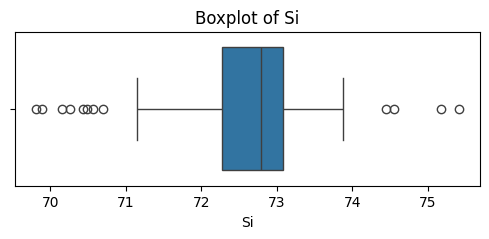

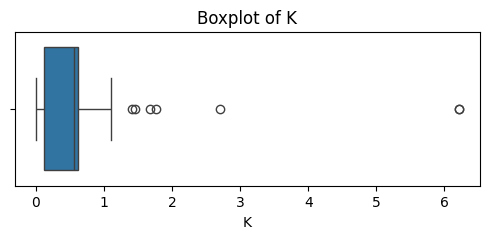

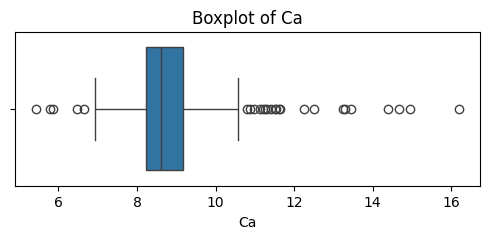

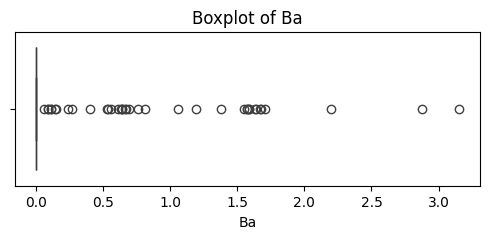

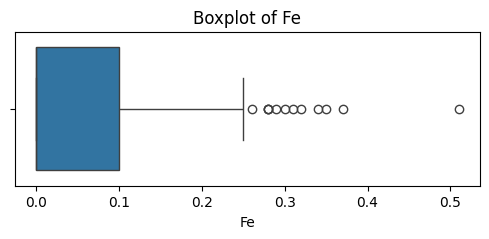

In [50]:
# Boxplots for Outliers
for column in df.drop('Type', axis=1).columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

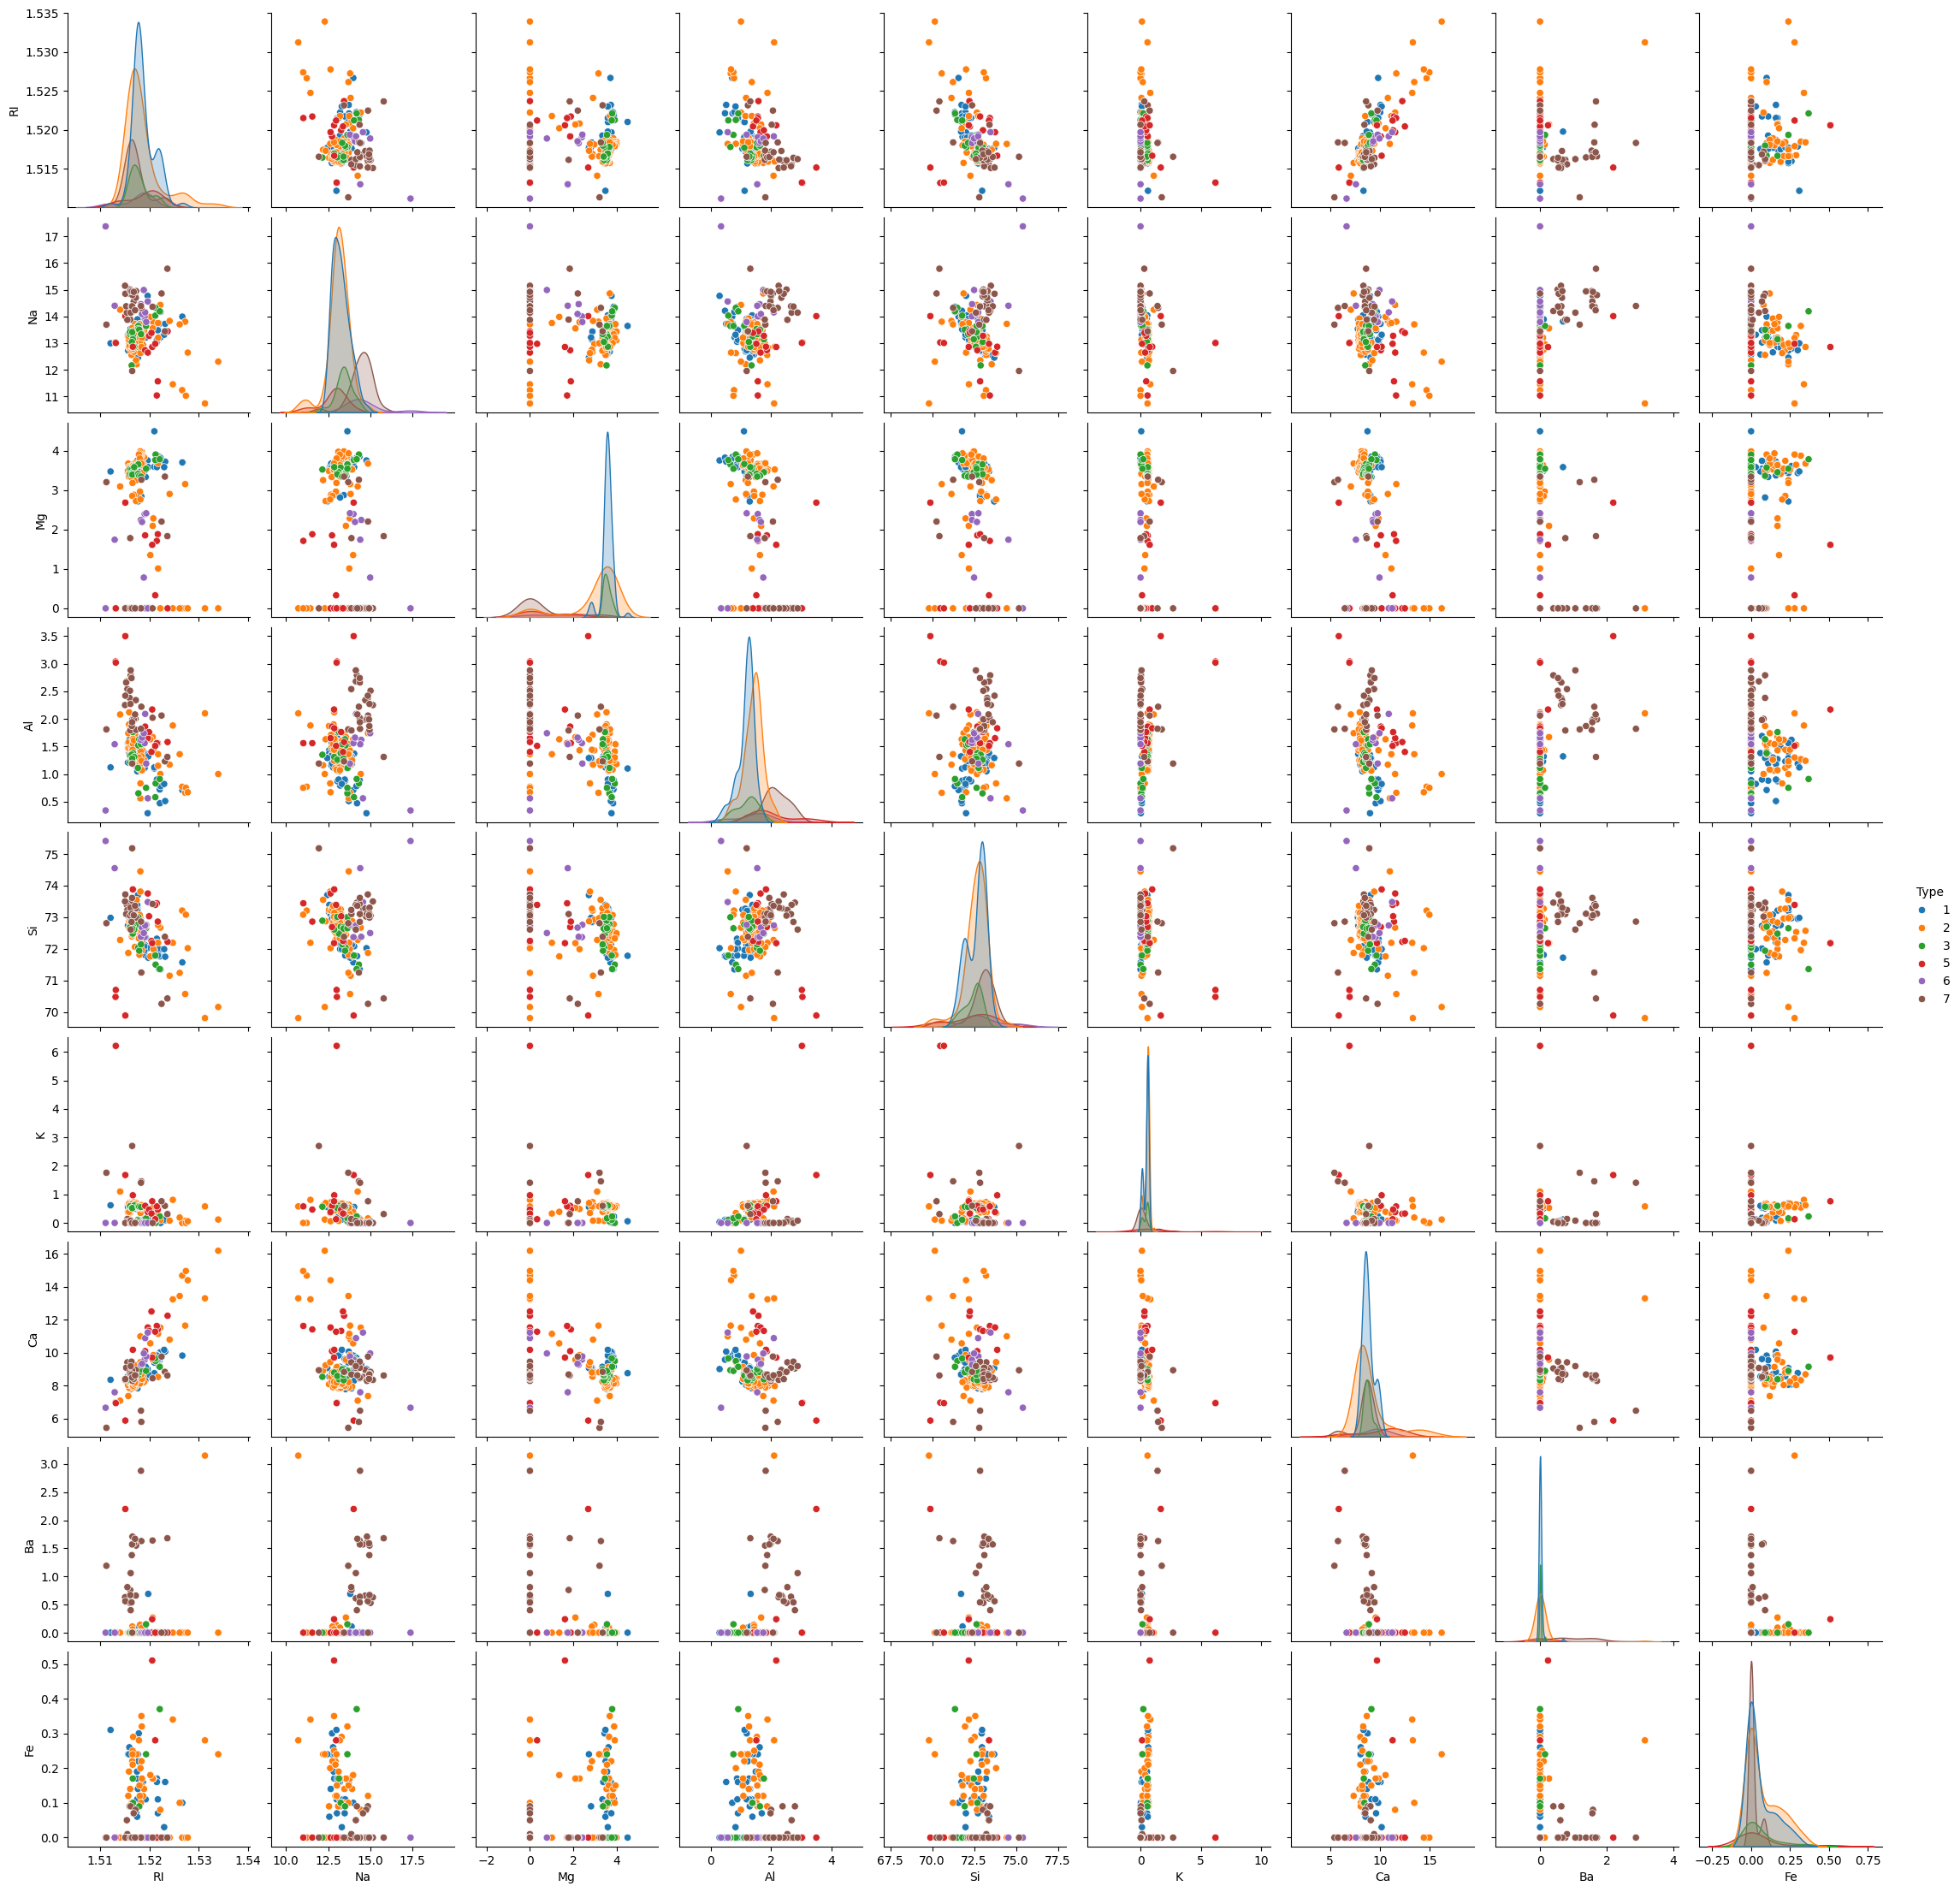

In [51]:
# Pairplot to visualize feature relationships
sns.pairplot(df, hue='Type', palette='tab10')
plt.show()

# 5: Data Preprocessing.
#### Handle missing value.
#### Check for categorical columns.
#### Feature Scaling
#### Handle Class Imbalance using SMOTE.
#### Train-test split.

In [52]:
# 5: Data Preprocessing

# a. Handle missing values (none expected here)
# Already checked, if present you could use df.dropna() or fillna()

# b. Check for categorical columns
# All features appear numeric, so no encoding required

# c. Feature Scaling
X = df.drop('Type', axis=1)
y = df['Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
# d. Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# 6: Random Forest Model Implementation.
#### Evaluation.
#### Confusion Matrix.

In [54]:
# 6: Random Forest Model Implementation

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.87      0.81        15
           2       0.93      0.87      0.90        15
           3       0.93      0.87      0.90        15
           5       0.94      0.94      0.94        16
           6       1.00      1.00      1.00        16
           7       0.93      0.93      0.93        15

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92

Accuracy Score: 0.9130434782608695


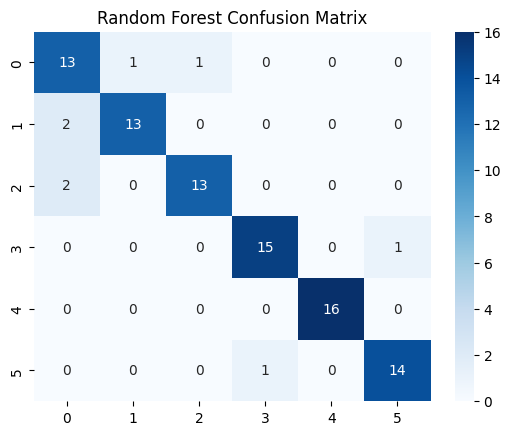

In [55]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# 7: Bagging Classifier

In [56]:
# 7: Bagging Classifier

# Replace 'base_estimator' with 'estimator'
bagging = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
bag_pred = bagging.predict(X_test)

print("Bagging Classification Report:")
print(classification_report(y_test, bag_pred))
print("Accuracy Score:", accuracy_score(y_test, bag_pred))

Bagging Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.87      0.76        15
           2       0.92      0.80      0.86        15
           3       0.92      0.73      0.81        15
           5       0.89      1.00      0.94        16
           6       1.00      1.00      1.00        16
           7       1.00      0.93      0.97        15

    accuracy                           0.89        92
   macro avg       0.90      0.89      0.89        92
weighted avg       0.90      0.89      0.89        92

Accuracy Score: 0.8913043478260869


# 8: Boosting Classifier (AdaBoost)

In [57]:
# 8: Boosting Classifier (AdaBoost)

boosting = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting.fit(X_train, y_train)
boost_pred = boosting.predict(X_test)

print("Boosting Classification Report:")
print(classification_report(y_test, boost_pred))
print("Accuracy Score:", accuracy_score(y_test, boost_pred))

Boosting Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.25      0.13      0.17        15
           3       0.39      1.00      0.57        15
           5       0.64      0.44      0.52        16
           6       1.00      1.00      1.00        16
           7       0.76      0.87      0.81        15

    accuracy                           0.58        92
   macro avg       0.51      0.57      0.51        92
weighted avg       0.51      0.58      0.52        92

Accuracy Score: 0.5760869565217391


# 9. Interview Questions: Answers
### 1: Explain Bagging and Boosting. How are they different?

#### Bagging.
###### a. Trains models in parallel.
###### b. Aims to reduce variance.
###### c. Each model is trained independently.
###### Example: Random Forest.

#### Boosting.
###### a. Trains models sequentially.
###### b.	Aims to reduce bias.
###### c. 	Each model focuses on correcting errors of previous.
###### Example: AdaBoost, Gradient Boosting.

### 2: How to handle imbalance in the data?
#### - SMOTE (Synthetic Minority Over-sampling Technique): Creates synthetic data for minority classes.
#### - Class Weights: Give more importance to minority classes in model training.
#### - Resampling Techniques: Oversampling or undersampling based on the class distribution.
#### - Ensemble Techniques: Use classifiers that perform better on imbalanced data like Random Forest or XGBoost.